In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_presion = pd.read_csv('Presion_atmoferica_limpio_2021.csv', index_col=0)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_presion.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Año
14350546,48015040,255.0,01/01/2021 07:31:00 AM,1001.0,PTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780000,-70.363000,Presión Atmosferica (1h),HPa,2021
14350547,24010390,255.0,01/01/2021 07:00:00 PM,726.0,El TRIANGULO - CAR,CUNDINAMARCA,LENGUAZAQUE,SOGAMOSO,5.305000,-73.619000,Presión Atmosferica (1h),HPa,2021
14350548,24055080,255.0,01/01/2021 01:00:00 PM,998.6,VIZCAINA LA LIZAMA - AUT,SANTANDER,BARRANCABERMEJA,SOGAMOSO,6.982972,-73.704889,Presión Atmosferica (1h),HPa,2021
14350549,24015506,255.0,01/01/2021 08:00:00 AM,754.0,CAPELLANIA - CAR,CUNDINAMARCA,FÚQUENE,SOGAMOSO,5.449000,-73.769000,Presión Atmosferica (1h),HPa,2021
14350550,48015040,255.0,01/01/2021 07:48:00 AM,1000.9,PTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780000,-70.363000,Presión Atmosferica (1h),HPa,2021


## Verificamos si aún hay valores NaN

In [3]:
df_presion.isna().sum()

CodigoEstacion       0
CodigoSensor         0
FechaObservacion     0
ValorObservado       0
NombreEstacion       0
Departamento         0
Municipio            0
ZonaHidrografica     0
Latitud              0
Longitud             0
DescripcionSensor    0
UnidadMedida         0
Año                  0
dtype: int64

In [32]:
df_presion.columns

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida', 'Año'],
      dtype='object')

In [33]:
df_presion['Municipio'].value_counts()

PUERTO NARIÑO             114692
BOGOTA, D.C                22215
LA CALERA                   7544
VILLAGÓMEZ                  6691
PASCA                       5135
PULÍ                        5120
LA VEGA                     5002
TABIO                       4704
FUNZA                       4467
CHOCONTÁ                    4157
SOPÓ                        3987
SARAVENA                    3885
SURATÁ                      3727
CARTAGENA DE INDIAS         3456
AQUITANIA                   2891
TONA                        2569
ZIPAQUIRÁ                   2544
TENA                        2501
SOGAMOSO                    2459
PLANADAS                    2173
CUCUNUBÁ                    2120
IBAGUÉ                      2026
BARRANQUILLA                1988
BUCARAMANGA                 1985
ALBANIA                     1981
QUIBDÓ                      1978
BAHÍA SOLANO (MUTIS)        1977
CUÍTIVA                     1976
CERRITO                     1974
CÉRTEGUI                    1972
EL GUAMO  

# Gráficos

# Compara la presión atmosférica entre diferentes ciudades

#### Dato: puedes utilizar un gráfico de barras. Cada barra puede representar la presión atmosférica en una ciudad diferente. El eje y puede representar la presión atmosférica en hPa. Esto te permitirá comparar las diferencias en la presión atmosférica entre ciudades.

In [7]:
# Filtramos las columnas que utlizaremos
df_presion = df_presion[['ValorObservado', 'NombreEstacion', 'Municipio']]

In [8]:
# Agrupare los datos por ciudad y para obtener el valor promedio de la presión atmosférica
df_promedio_presion = df_presion.groupby(['Municipio']).mean()

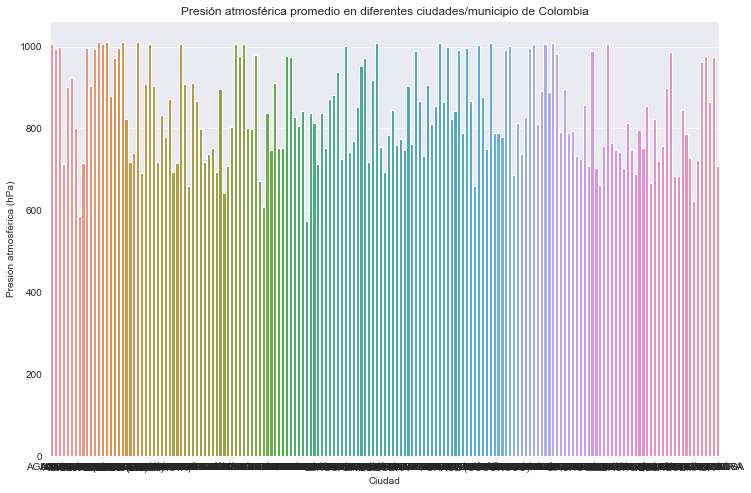

In [9]:
# Ahora creamos el gráfico de barras para cada municipio
sns.set_style("darkgrid") # Establece el estilo de fondo para el gráfico
fig, ax = plt.subplots(figsize=(12,8)) # Creacion del lienzo con su tamaño de ancgo y alto
sns.barplot(x=df_promedio_presion.index, y='ValorObservado', data=df_promedio_presion, ax=ax)#Crea  gráfico de barras utilizando los datos del DataFrame
ax.set_xlabel('Ciudad') # eje x
ax.set_ylabel('Presión atmosférica (hPa)') # eje y
ax.set_title('Presión atmosférica promedio en diferentes ciudades/municipio de Colombia')
plt.show()

## 2da forma

In [10]:
# Agrupare los datos por ciudad y para obtener el valor promedio de la presión atmosférica
# Aqui ya es más manual, ya que indicamos las ciudades o municipios a trabajar
ciudades = ['BARRANQUILLA', 'CALI', 'MEDELLÍN']
# Cogemos la variable donde almacena algunos municipios y le indicamos mediante el isin que trabaje con ellos
df_promedio_presion = df_presion[df_presion['Municipio'].isin(ciudades)].groupby(['Municipio']).mean()

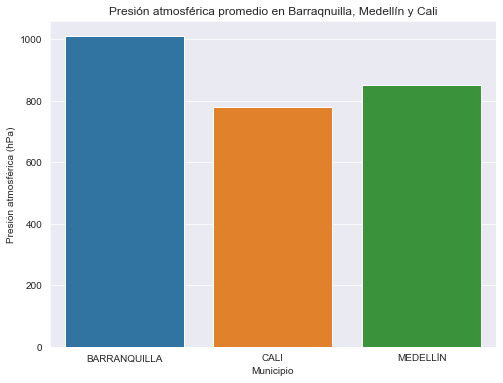

In [11]:
# Creamos el gráfico de barras para cada ciudad
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=df_promedio_presion.index, y='ValorObservado', data=df_promedio_presion, ax=ax)
ax.set_xlabel('Municipio')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title('Presión atmosférica promedio en Barraqnuilla, Medellín y Cali')
plt.show()

## 3ra forma

In [12]:
# Agrupar los datos por municipio y obtener el valor promedio de la presión atmosférica
df_promedio_presion = df_presion.groupby(['Municipio']).mean()

In [13]:
# Ordenar los datos por el valor promedio de la presión atmosférica y obtener los N municipios con la mayor y menor presión atmosférica
municipios_mas_presion = df_promedio_presion.sort_values(by='ValorObservado', ascending=False).head(6)
municipios_menos_presion = df_promedio_presion.sort_values(by='ValorObservado', ascending=True).head(6)

In [16]:
# Aqui vemos
municipios_mas_presion

,ValorObservado
Municipio,
BAHÍA SOLANO (MUTIS),1011.653869
BOJAYÁ (BELLAVISTA),1010.540860
BARRANQUILLA,1010.191600
ARJONA,1010.094722
PIVIJAI,1009.324390
MONTERÍA,1009.014128


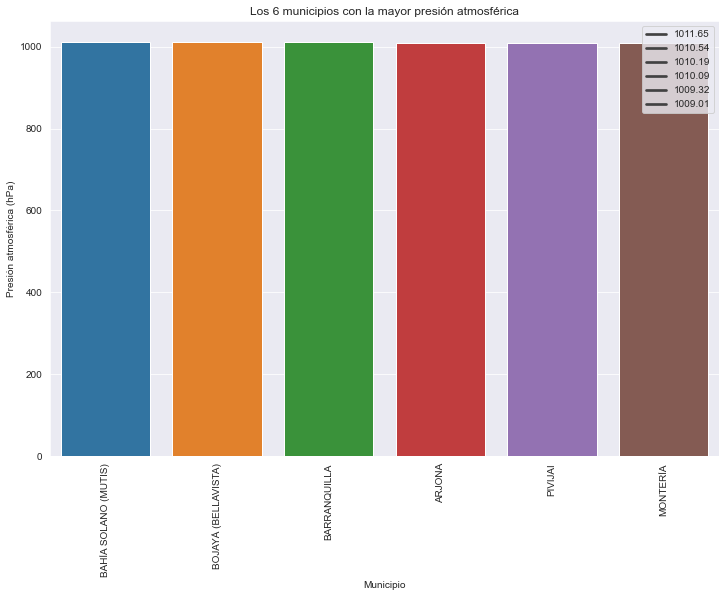

In [24]:
# Creacion de gráfico de barras para los N municipios con la mayor presión atmosférica
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=municipios_mas_presion.index, y='ValorObservado', data=municipios_mas_presion, ax=ax)
ax.set_xlabel('Municipio')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title('Los 6 municipios con la mayor presión atmosférica')
ax.legend(municipios_mas_presion['ValorObservado'].round(2))
plt.xticks(rotation=90)

plt.show()

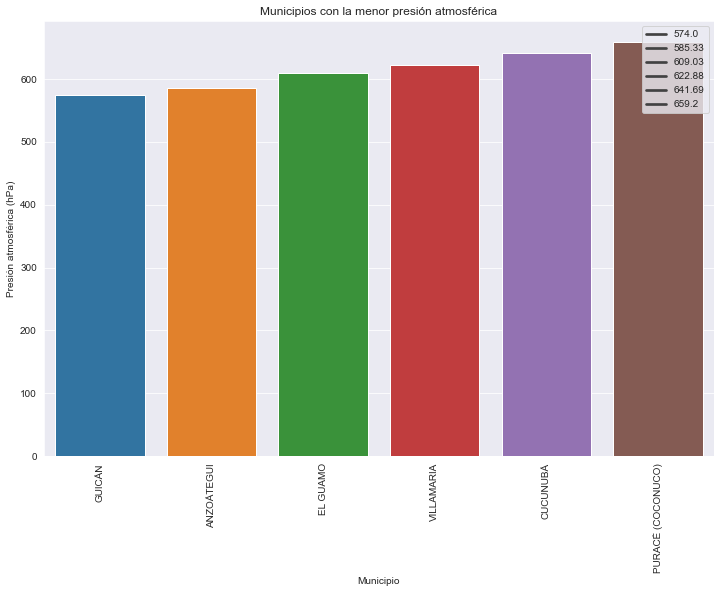

In [25]:
# Creacion de gráfico de barras para los N municipios con la menor presión atmosférica
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=municipios_menos_presion.index, y='ValorObservado', data=municipios_menos_presion, ax=ax)
ax.set_xlabel('Municipio')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title('Municipios con la menor presión atmosférica')
ax.legend(municipios_menos_presion['ValorObservado'].round(2))
plt.xticks(rotation=90)
plt.show()

# Busca la forma de observar la distribución de la presión atmosférica en diferentes ciudades

### Aqui utlizare el gráfico de caja y bigotes para observar la distribución de la presión atmosférica en diferentes ciudades

In [27]:
df_presion_box = df_presion[['NombreEstacion', 'ValorObservado']]

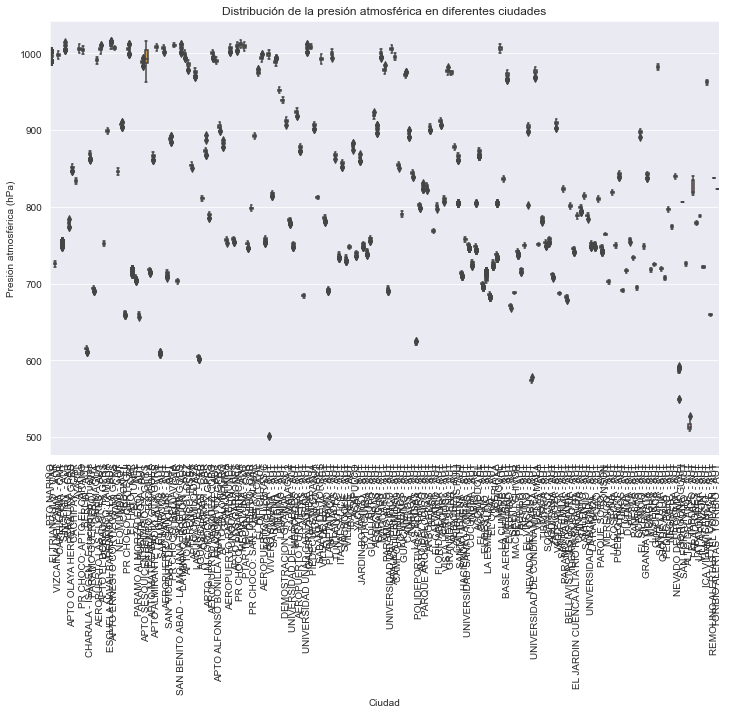

In [28]:
# Crear el gráfico de caja y bigotes
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='NombreEstacion', y='ValorObservado', data=df_presion_box, ax=ax)
ax.set_xlabel('Ciudad')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title('Distribución de la presión atmosférica en diferentes ciudades')
plt.xticks(rotation=90)
plt.show()

### Indicamos con los municipios con el cual vamos a trabajar

In [29]:
# ahora con los muncipios para visualizar
municipios = ['NARIÑO', 'BARRANQUILLA', 'COGUA']
df_municipios = df_presion[df_presion['Municipio'].isin(municipios)]

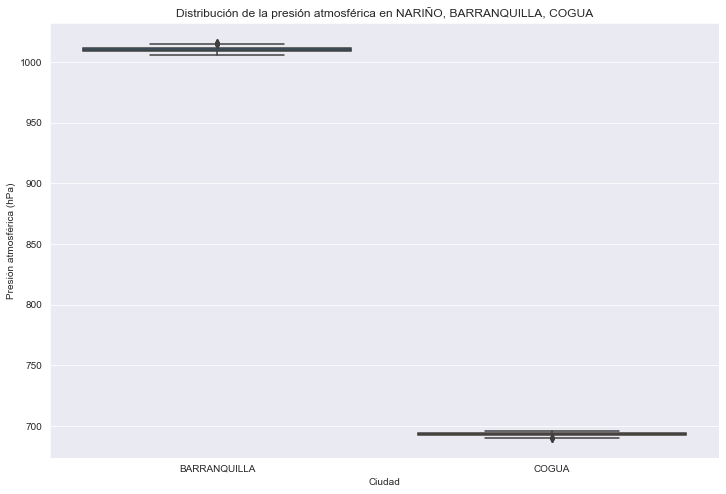

In [30]:
# Crear el gráfico de caja y bigotes
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Municipio', y='ValorObservado', data=df_municipios, ax=ax)
ax.set_xlabel('Ciudad')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title(f'Distribución de la presión atmosférica en {", ".join(municipios)}')
plt.show()

## 3ra forma, que es con el mayor y menor presión

In [57]:
# Obtension de la presión atmosférica promedio por municipio y ordenarlos de menor a mayor
df_promedio_presion = df_presion.groupby('Municipio')['ValorObservado'].mean().sort_values()

In [58]:
# Municipio con la mayor presión atmosférica
municipio_max_presion = df_promedio_presion.index[-1] # -1 porque esta ordenado a menor a mayor

# Municipio con la menor presión atmosférica
municipio_min_presion = df_promedio_presion.index[0]

In [60]:
# Creacion de nuevo dataframe con los dos municipios seleccionados
df_municipios = df_presion[(df_presion['Municipio'] == municipio_max_presion) | (df_presion['Municipio'] == municipio_min_presion)]

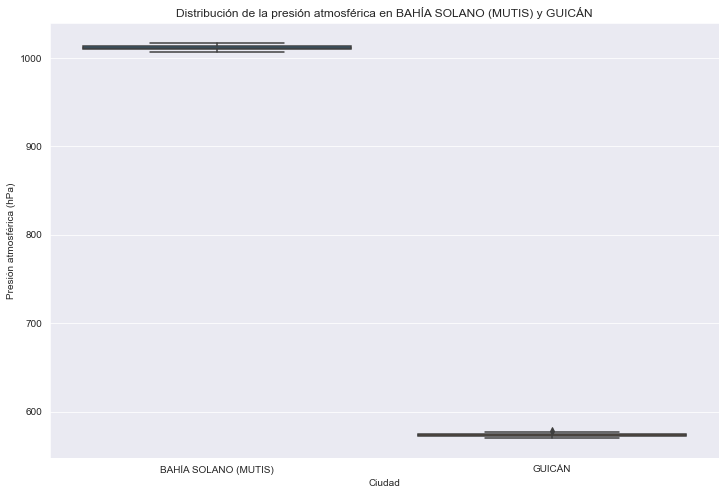

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Municipio', y='ValorObservado', data=df_municipios, ax=ax)
ax.set_xlabel('Ciudad')
ax.set_ylabel('Presión atmosférica (hPa)')
ax.set_title(f'Distribución de la presión atmosférica en {municipio_max_presion} y {municipio_min_presion}')
plt.show()